<a href="https://colab.research.google.com/github/Sebas-Gonzalez/IA_2022/blob/main/Sentimientos_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.category.unique()


array([-1.,  0.,  1., nan])

In [6]:
print(np.shape(df))
df= df.dropna()
print(np.shape(df))
df

(162980, 2)
(162969, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
XG=[]
YG=[]
for j in range(1,20):
  features=500*j
  
  vec = CountVectorizer(max_features=features)
  vec.fit(df['clean_text'])
  
  x = df["clean_text"]
  Y = df["category"]
  X = vec.transform(x)
  x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)


  logreg = LogisticRegression()
  logreg.fit(x_train,y_train)
  logreg_pred = logreg.predict(x_test)
  precision = accuracy_score(logreg_pred, y_test)
  XG.append(features)
  YG.append(precision)


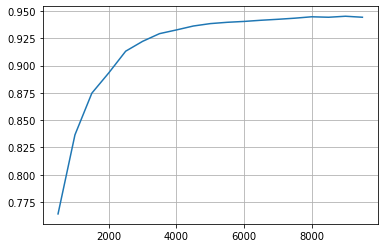

In [ ]:
plt.plot(XG,YG)
plt.grid(visible=True)

# **Ejemplo de como funciona CountVectorizer**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(ngram_range=(1, 1))#,max_features=10)
x_traincv = cv.fit_transform(["Hi how are you, what are you doing tomorrow?","Hey what's up","Wow cool tutorials"])

In [ ]:
cv.get_feature_names()

['are',
 'cool',
 'doing',
 'hey',
 'hi',
 'how',
 'tomorrow',
 'tutorials',
 'up',
 'what',
 'wow',
 'you']

In [ ]:
x_traincv.toarray()

array([[2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [ ]:
cv.inverse_transform(x_traincv)

[array(['hi', 'how', 'are', 'you', 'what', 'doing', 'tomorrow'],
       dtype='<U9'),
 array(['what', 'hey', 'up'], dtype='<U9'),
 array(['wow', 'cool', 'tutorials'], dtype='<U9')]

#Matriz de Confusion


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
  
vec = CountVectorizer(max_features=4000)
vec.fit(df['clean_text'])

x = df["clean_text"]
Y = df["category"]
X = vec.transform(x)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)


logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
precision = accuracy_score(logreg_pred, y_test)

In [10]:
y_test

42229     0.0
22035     1.0
79982    -1.0
118493   -1.0
12815     0.0
         ... 
47105     1.0
33632    -1.0
93676     0.0
37757     0.0
132997    1.0
Name: category, Length: 32594, dtype: float64

In [11]:
matriz = confusion_matrix(y_test,logreg_pred)
accuaracy = accuracy_score(y_test,logreg_pred)
precision = precision_score(y_test,logreg_pred,average='macro')
recall = recall_score(y_test,logreg_pred,average='macro')
f1 = f1_score(y_test, logreg_pred,average='macro')

In [13]:

print("Accuaracy: ",accuaracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)

Accuaracy:  0.9326563171135792
Precision:  0.9276145005481582
Recall:  0.9233100828233813
F1:  0.9251044239677421


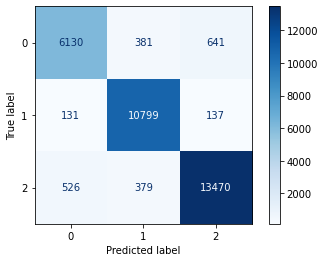

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
Display= ConfusionMatrixDisplay(confusion_matrix = matriz)
Display.plot(cmap="Blues")
plt.show()